# **Multiple Linear Regression case study - I**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


There are no missing values in the dataset

In [79]:
df.duplicated().sum()

0

In [80]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


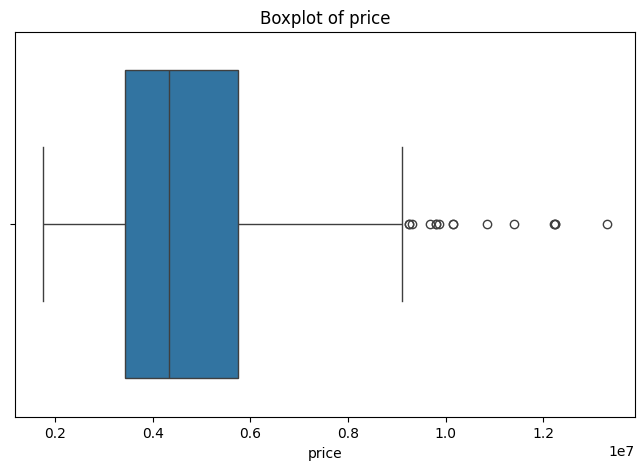

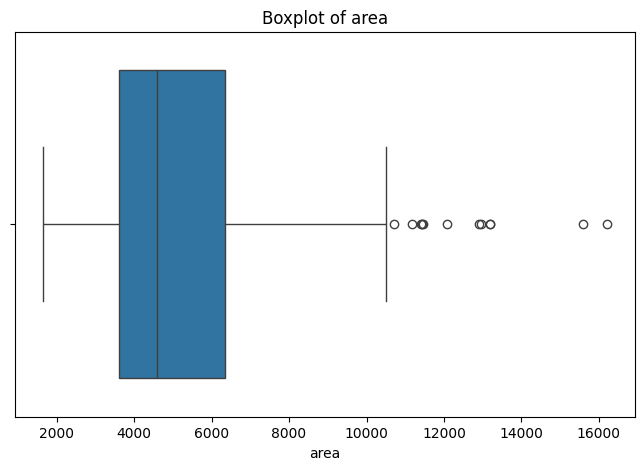

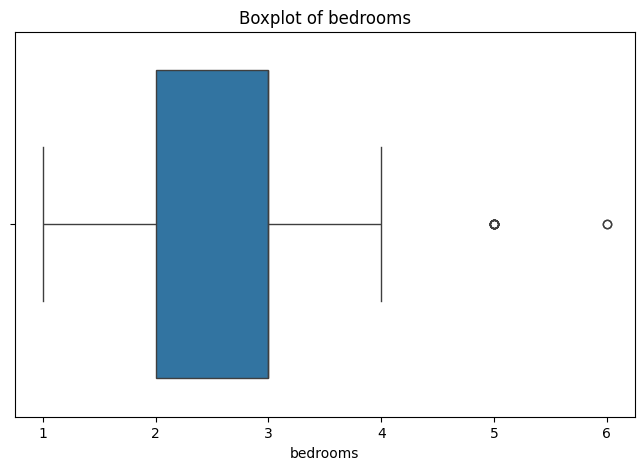

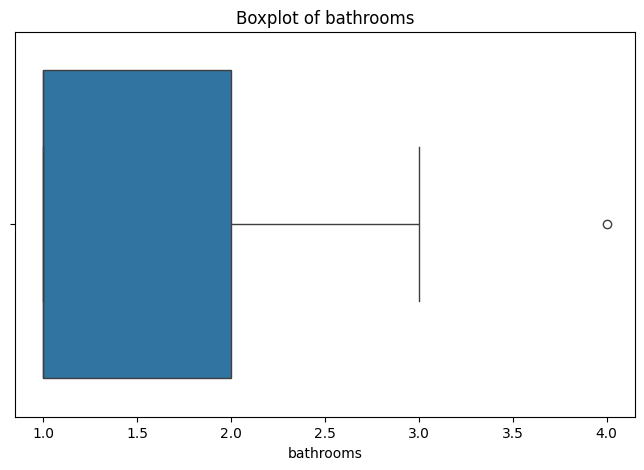

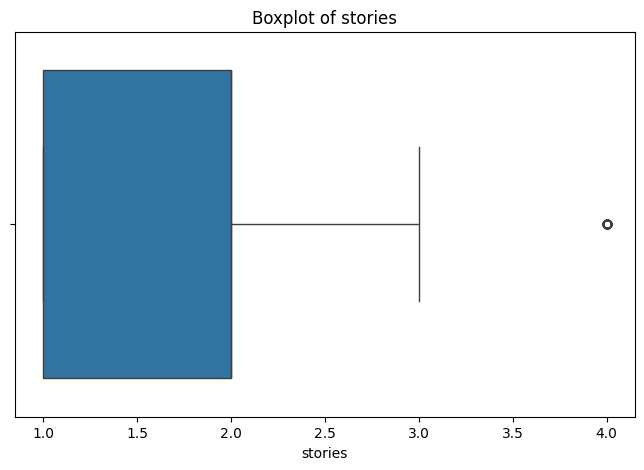

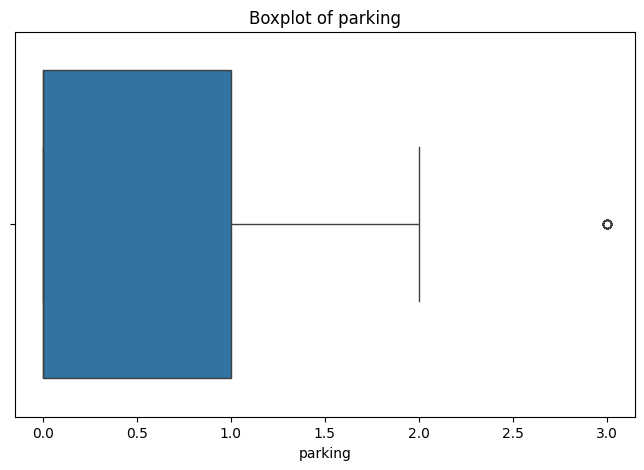

In [81]:
num_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in num_columns:
  plt.figure(figsize = (8,5))
  sns.boxplot(data = df, x = col)
  plt.title(f"Boxplot of {col}")

In [82]:
Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[num_columns] < lower_bound) | (df[num_columns] > upper_bound)).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")


Number of outliers: 82


* The any(axis=1) part of the code is used to check if any value in a row is outside the lower and upper bounds (i.e., if any of the columns in that row have an outlier).
*This checks each row. If any column in a row is identified as an outlier, the result will be True. Otherwise, it will be False.

In [83]:
two_columns = ['price', 'area']
for col in two_columns:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df[col] = df[col].clip(lower, upper)


### **Purpose of This Code:**
Outlier Treatment:

* The goal here is to limit extreme values (outliers) that might distort the analysis or model.
* Capping Values: Values that are too high or too low are replaced by the thresholds, effectively clipping the outliers.
* The clipping operation in the code provided does not remove rows; it just modifies the outlier values in those rows.
* Therefore, no rows are removed (i.e., no null values are introduced). The outliers are not deleted, but their extreme values are replaced by the boundary values you've set (the 5th and 95th percentiles).

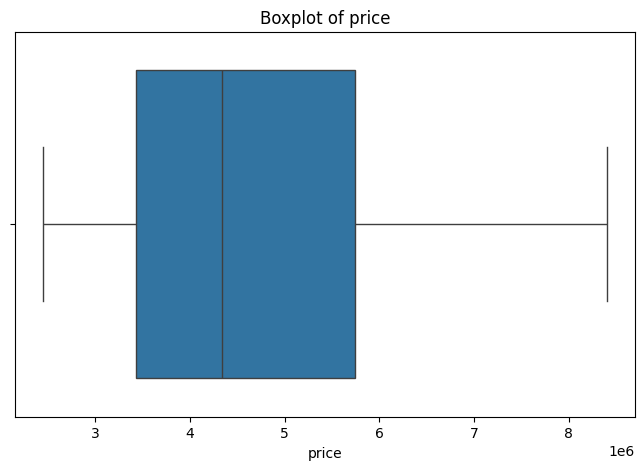

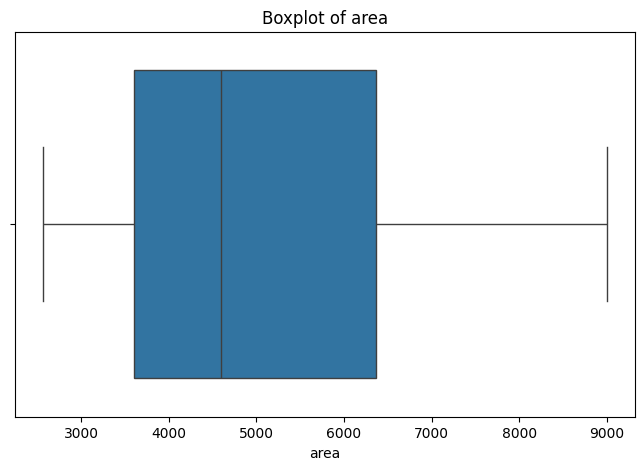

In [84]:
num_columns = ['price', 'area']

for col in num_columns:
  plt.figure(figsize = (8,5))
  sns.boxplot(data = df, x = col)
  plt.title(f"Boxplot of {col}")

<Axes: >

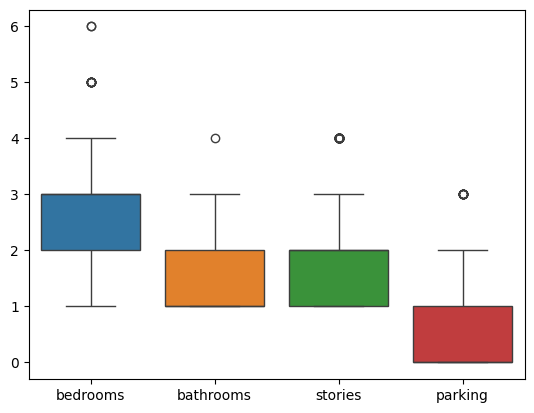

In [85]:
sns.boxplot(df[['bedrooms', 'bathrooms', 'stories', 'parking']])

**Outliers are Not That Extreme:**

* If the outliers are not too far from the general data distribution and don’t cause a large impact on the model performance, you might skip clipping and leave the data as is.

In [86]:
df['price'].shape

(545,)

In [87]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.712624e+06,5065.550459,2.965138,1.286239,1.805505,0.693578
std,1.650133e+06,1840.682265,0.738064,0.502470,0.867492,0.861586
min,2.450000e+06,2562.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,8.400000e+06,9000.000000,6.000000,4.000000,4.000000,3.000000


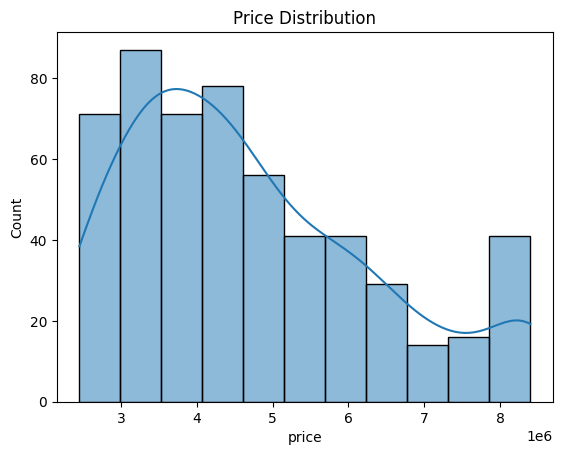

In [88]:
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()


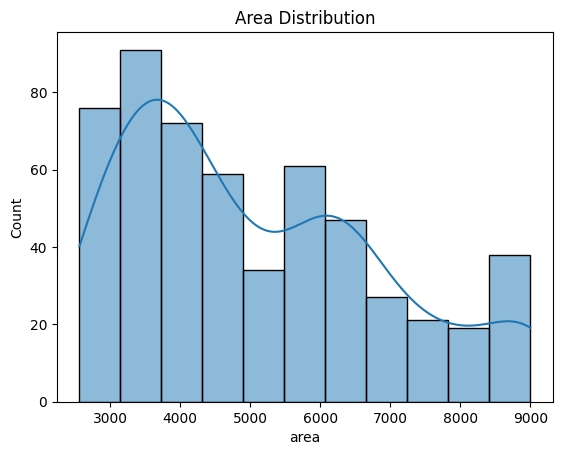

In [90]:
sns.histplot(df['area'], kde=True)
plt.title('Area Distribution')
plt.show()

In [91]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,8400000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8400000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,8400000,9000,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,8400000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,8400000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [96]:
df.columns = df.columns.str.strip()

In [100]:
categorical_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                   'airconditioning', 'prefarea', 'furnishingstatus']

present_col = [col for col in categorical_col if col in df.columns]

In [101]:
present_col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [104]:
df = pd.get_dummies(data = df, columns = present_col, drop_first = True)

In [106]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8400000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8400000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,8400000,9000,3,2,2,2,True,False,True,False,False,True,True,False
3,8400000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,8400000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [108]:
df.shape

(545, 14)

In [110]:
X = df.drop('price', axis = 1)
y = df['price']

In [118]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9000,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,2562,3,1,1,0,False,False,False,False,False,False,True,False
542,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [113]:
y

,price
0,8400000
1,8400000
2,8400000
3,8400000
4,8400000
...,...
540,2450000
541,2450000
542,2450000
543,2450000


In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [121]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,True,False,False,False,True,False,False,False
93,7200,3,2,1,3,True,False,True,False,True,False,True,False
335,3816,2,1,1,2,True,False,True,False,True,False,False,False
412,2610,3,1,2,0,True,False,True,False,False,True,False,True
471,3750,3,1,2,0,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,True,False,False,False,True,False,False,True
106,5450,4,2,1,0,True,False,True,False,True,True,True,False
270,4500,3,2,3,1,True,False,False,True,False,False,False,False
435,4040,2,1,1,0,True,False,False,False,False,False,False,True


In [123]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [124]:
lr.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = lr.predict(X_test)

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

MAE: 819554.037620561
MSE: 1087348817252.8337
RMSE: 1042760.1916322054
R2: 0.6832155659122994


In [139]:
lr.coef_

array([ 2.77188670e+02,  7.54959102e+04,  8.89125358e+05,  4.02454818e+05,
        1.53792383e+05,  3.48239021e+05,  2.08819160e+05,  3.52953988e+05,
        6.97935827e+05,  6.96379619e+05,  5.53798363e+05, -6.32860947e+04,
       -3.65760141e+05])

In [137]:
coefficient = pd.DataFrame({
    'Features' : X.columns,
    'Coefficient' : lr.coef_
}).sort_values('Coefficient', ascending = False)

print(coefficient)

                           Features    Coefficient
2                         bathrooms  889125.357812
8               hotwaterheating_yes  697935.827055
9               airconditioning_yes  696379.618886
10                     prefarea_yes  553798.363299
3                           stories  402454.817638
7                      basement_yes  352953.987632
5                      mainroad_yes  348239.020694
6                     guestroom_yes  208819.159941
4                           parking  153792.383318
1                          bedrooms   75495.910203
0                              area     277.188670
11  furnishingstatus_semi-furnished  -63286.094723
12     furnishingstatus_unfurnished -365760.141453


### **Key Insights:**

* The bathrooms, hotwaterheating, airconditioning, and prefarea features have large positive coefficients, indicating they strongly contribute to increasing the price of a home.

* Furnishing status has a negative impact on the price, with unfurnished homes having the largest negative effect.

### **Understanding Coefficients:**

* The magnitude of the coefficient reflects the strength of the feature's effect on the target variable.

* The sign (positive or negative) indicates the direction of the relationship (positive means an increase in the target variable with an increase in the feature, negative means a decrease in the target with an increase in the feature).

In [138]:
lr.intercept_

395705.39773956966

### **Conclusion:**

* The model suggests that features like bathrooms, hotwaterheating, and airconditioning have the most significant positive impact on home prices, while features like furnishingstatus_unfurnished negatively affect the price.


* The intercept value on its own isn’t "good" or "off." The real question is whether the overall model predictions (based on the coefficients and intercept) match the actual prices in your dataset well. Given metrics (especially the R² score of 0.68), it looks like the model is doing a decent job, but there might still be room for refinement.